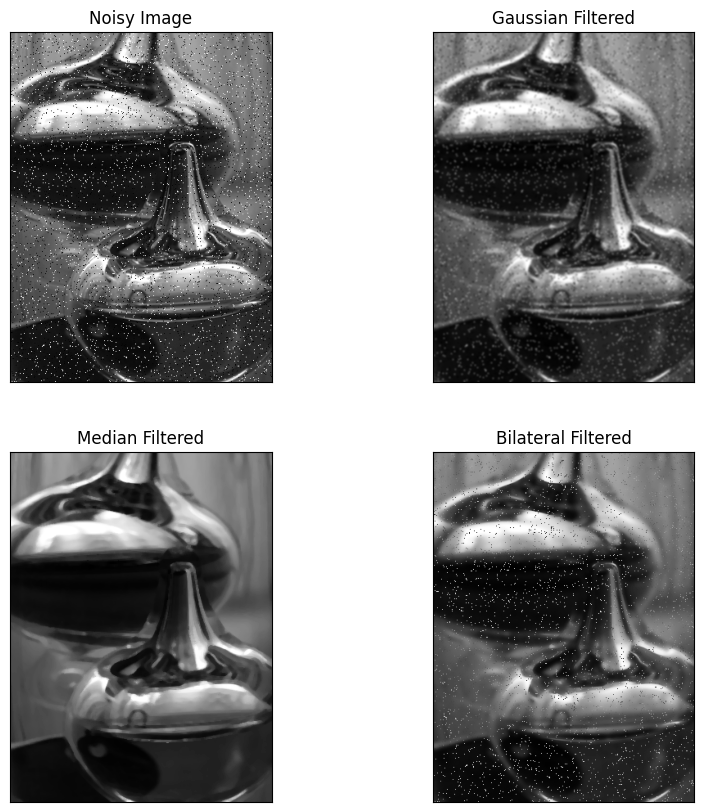

True

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


noisy_image = cv2.imread('C:\\Users\\mites\\OneDrive\\Desktop\\CV_Assignment 1- database\\Assignment 1 database\\Q4\\Noisy image.png')  # Replace with the actual file path


gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)


gaussian_filtered = cv2.GaussianBlur(gray_image, (5, 5), 0)


median_filtered = cv2.medianBlur(gray_image, 5)


bilateral_filtered = cv2.bilateralFilter(gray_image, 9, 75, 75)


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered'), plt.xticks([]), plt.yticks([])

plt.show()


cv2.imwrite('gaussian_filtered_image.png', gaussian_filtered)
cv2.imwrite('median_filtered_image.png', median_filtered)
cv2.imwrite('bilateral_filtered_image.png', bilateral_filtered)


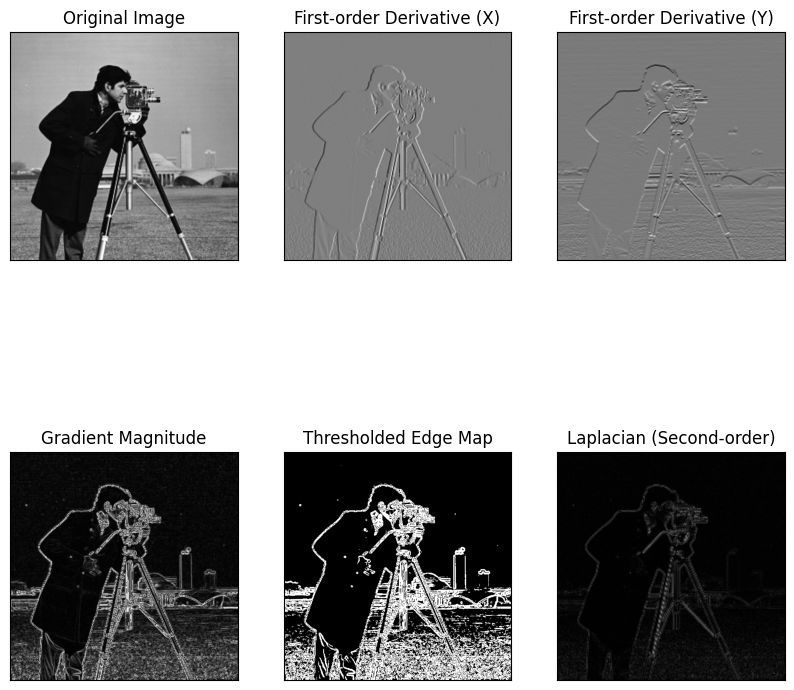

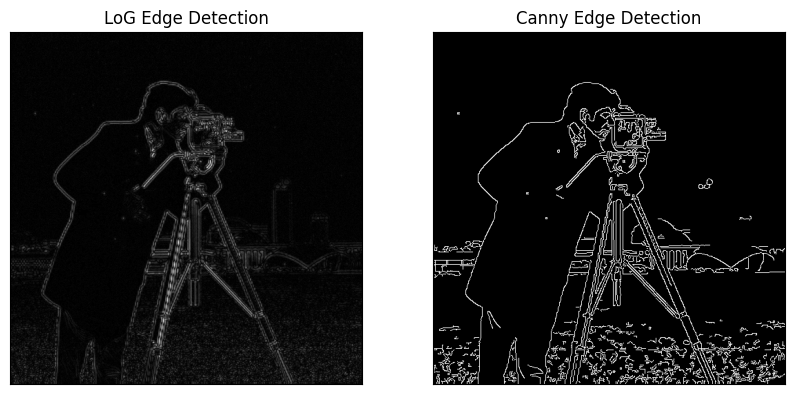

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image_path = r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 1- database\Assignment 1 database\Q5\cameraman.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # First order derivative along x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # First order derivative along y


gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)


_, edge_map = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)


laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))


gaussian_blur = cv2.GaussianBlur(image, (3, 3), 0)
log_edges = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
log_edges = np.uint8(np.absolute(log_edges))


canny_edges = cv2.Canny(image, 100, 200)


plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2), plt.imshow(sobel_x, cmap='gray')
plt.title('First-order Derivative (X)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3), plt.imshow(sobel_y, cmap='gray')
plt.title('First-order Derivative (Y)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5), plt.imshow(edge_map, cmap='gray')
plt.title('Thresholded Edge Map'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian (Second-order)'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(log_edges, cmap='gray')
plt.title('LoG Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()
